In [1]:
import pennylane as qml
from pennylane import numpy as np

In [2]:



def prepare_state(theta, phi):
    """Quantum function to prepare states of the form
        cos(\theta/2) |0> + e^(i\phi) sin(\theta/2) |1>.

    In principle, this function would be hidden, with no knowledge of theta/phi,
    in order to prepare a truly random state. It is provided here just for
    expository purposes.
    """
    qml.RY(theta, wires=0)
    qml.RZ(phi, wires=0)

    return qml.state()


def extract_bloch_vector(theta, phi):
    """Given a set of angular parameters representing the quantum state
        cos(\theta/2) |0> + e^(i\phi) sin(\theta/2) |1>,
    compute the Bloch vector associated to this state.

    The Bloch vector has three real-valued elements representing the position of
    the quantum state in the 3-dimensional space of the Bloch sphere. It can
    be computed by measuring a cleverly-chosen set of expectation values.

    Args:
        theta (float): Angular parameter of the states.
        phi (float): Phase parameter of the state.

    Returns:
        bloch_vector (array[float, float, float]): A NumPy array representing the
        3-element Bloch vector.
    """
    # Note here that we use an analytic device so that we get exact results
    dev = qml.device("default.qubit", wires=1)

    # YOUR CODE HERE
    # Use theta, phi *only* as arguments to prepare_state

    x = np.cos(phi) * np.sin(theta)
    y = np.sin(phi) * np.sin(theta)
    z = np.cos(theta)

    return np.array([x, y, z])

In [3]:
def part_a():
    """Write a quantum circuit that computes the Boolean function
        f(a, b, c, d) = ab + cd
    where the + here represents the XOR operation.

    The first four qubits of your circuit should correspond to the
    input variables, a, b, c, d, in that order. The last qubit of your
    circuit should correspond to the output. If you use an auxiliary wires
    in your circuit, these should be uncomputed, like so:
          _______
     a ---|  C  |--- a
     b ---|  I  |--- b
     c ---|  R  |--- c
     d ---|  C  |--- d
     0 ---|     |--- 0 # Optional aux. wires
     0 ---|     |--- 0
          ...
     0 ---=======--- ab + cd

    """

    # You can change this to as many wires as you need
    num_wires = 7

    # Do not change the number of shots on the device
    dev = qml.device("default.qubit", wires=num_wires, shots=1)

    @qml.qnode(dev)
    def my_circuit(a, b, c, d):
        """ Args:
                a, b, c, d (int): The input variables, either 0 or 1.

            Returns:
                array[int]: A single sample of the output of your circuit.
        """

        # YOUR CODE HERE
        # Apply some quantum gates
        # Don't forget to initialize the first 4 wires based on a, b, c, d

        if a == 1:
            qml.PauliX(wires=0)
        if b == 1:
            qml.PauliX(wires=1)
        if c == 1:
            qml.PauliX(wires=3)
        if d == 1:
            qml.PauliX(wires=4)


        qml.Toffoli(wires=[0,1,2])
        qml.Toffoli(wires=[3,4,5])
        qml.CNOT(wires=[2, 5])

        # wires 2, 6 not used

        return qml.sample(wires=[0,1,3,4,2,6,5])

    return my_circuit

In [4]:
part_a()(1,1,1,1)

tensor([1, 1, 1, 1, 1, 0, 0], requires_grad=True)

In [5]:
def part_b():
    """Write a quantum circuit that computes the Boolean function
        f(a, b, c) = NOT(a) * b * c
    where the * here represents the AND operation.

    The first three qubits of your circuit should correspond to the
    input variables, a, b, c, in that order. The last qubit of your
    circuit should correspond to the output. If you use an auxiliary wires
    in your circuit, these should be uncomputed.

          _______
     a ---|  C  |--- a
     b ---|  I  |--- b
     c ---|  R  |--- c
     0 ---|  C  |--- 0 # Optional aux. wires
     0 ---|     |--- 0
            ...
     0 ---=======--- NOT(a) * b * c

    """

    # You can change this to as many wires as you need
    num_wires = 10

    # Do not change the number of shots on the device
    dev = qml.device("default.qubit", wires=num_wires, shots=1)

    @qml.qnode(dev)
    def my_circuit(a, b, c):
        """ Args:
                a, b, c (int): The input variables, either 0 or 1.

            Returns:
                array[int]: A single sample of the output of your circuit.
        """

        # YOUR CODE HERE
        # Apply some quantum gates
        qml.PauliX(wires=0)

        if a == 1:
            qml.PauliX(wires=1)
            qml.PauliX(wires=4)
        if b == 1:
            qml.PauliX(wires=2)
            qml.PauliX(wires=5)
        if c == 1:
            qml.PauliX(wires=3)
            qml.PauliX(wires=6)



        qml.CNOT(wires=[0,1])
        qml.Toffoli(wires=[1,2,8])
        qml.Toffoli(wires=[3,8,9])



        return qml.sample(wires=[4,5,6,9])

    return my_circuit

In [6]:
part_b()(0,0,1)

tensor([0, 0, 1, 0], requires_grad=True)

In [7]:
def part_c():
    """Write a quantum circuit that computes the Boolean function
        f(a, b, c) = a + a * NOT(b) + NOT(a * b * c)
    where the * here represents the AND operation, and + the XOR.

    The first three qubits of your circuit should correspond to the
    input variables, a, b, c, in that order. The last qubit of your
    circuit should correspond to the output. If you use an auxiliary wires
    in your circuit, these should be uncomputed.
          _______
     a ---|  C  |--- a
     b ---|  I  |--- b
     c ---|  R  |--- c
     0 ---|  C  |--- 0 # Optional aux. wires
     0 ---|     | 0
            ...
     0 ---=======---- a + a * NOT(b) + NOT(a * b * c)

    """

    # You can change this to as many wires as you need
    num_wires = 14

    # Do not change the number of shots on the device
    dev = qml.device("default.qubit", wires=num_wires, shots=1)

    @qml.qnode(dev)
    def my_circuit(a, b, c):
        """ Args:
                a, b, c (int): The input variables, either 0 or 1.

            Returns:
                array[int]: A single sample of the output of your circuit.
        """

        # YOUR CODE HERE
        # Apply some quantum gates
        if a == 1:
            qml.PauliX(wires=0)
            qml.PauliX(wires=3)
            qml.PauliX(wires=11)
            qml.PauliX(wires=13)
        if b == 1:
            qml.PauliX(wires=1)
            qml.PauliX(wires=4)
            qml.PauliX(wires=9)
        if c == 1:
            qml.PauliX(wires=2)
            qml.PauliX(wires=5)

        qml.PauliX(wires=8)
        qml.PauliX(wires=10)

        qml.Toffoli(wires=[3,4,6])
        qml.Toffoli(wires=[5,6,7])
        qml.CNOT(wires=[8,7])
        qml.CNOT(wires=[10,9])
        qml.Toffoli(wires=[9,11,12])
        qml.CNOT(wires=[12,13])
        qml.CNOT(wires=[7,13])



        return qml.sample(wires=[0,1,2,13])

    return my_circuit

In [8]:
print(part_c()(1,1,1))
print(part_c()(1,1,0))
print(part_c()(1,0,1))
print(part_c()(1,0,0))
print(part_c()(0,1,1))
print(part_c()(0,1,0))
print(part_c()(0,0,1))
print(part_c()(0,0,0))

[1 1 1 1]
[1 1 0 0]
[1 0 1 1]
[1 0 0 1]
[0 1 1 1]
[0 1 0 1]
[0 0 1 1]
[0 0 0 1]


In [88]:
def part_d():
    """Write a quantum circuit that computes the function
        f(a, b) = a + b
    where a, b are two-bit binary values, and + is regular binary addition.

    The first four qubits of your circuit should correspond to the input
    variables, a[0], a[1], b[0], b[1], in that order. The last three qubits of your
    circuit should correspond to the output in the order: carry, (a + b)[0], (a + b)[1].
    If you use an auxiliary wires in your circuit, these should be uncomputed.
           _______
     a0 ---|  C  |--- a0
     a1 ---|  I  |--- a1
     b0 ---|  R  |--- b0
     b1 ---|  C  |--- b1
      0 ---|     |--- 0 # Optional aux wires
             ...
      0 ---|     |--- 0
      0 ---|     |--- carry
      0 ---|     |--- s0
      0 ---=======--- s1

    """

    # You can change this to as many wires as you need
    num_wires = 15

    # Do not change the number of shots on the device
    dev = qml.device("default.qubit", wires=num_wires, shots=1)

    @qml.qnode(dev)
    def my_circuit(aa, bb, cc, dd):
        """ Args:
                a, b (list([int])): The input variables. For example, a = [1, 0] corresponds
                to a decimal value of 2.

            Returns:
                array[int]: A single sample of the output of your circuit.
        """
        a = [aa, bb]
        b = [cc, dd]

        if a[0] == 1:
            qml.PauliX(wires=0)
        if a[1] == 1:
            qml.PauliX(wires=1)
        if b[0] == 1:
            qml.PauliX(wires=2)
        if b[1] == 1:
            qml.PauliX(wires=3)


        if a[0] == 1:
            qml.PauliX(wires=4)
            qml.PauliX(wires=9)
        if a[1] == 1:
            qml.PauliX(wires=5)
        if b[0] == 1:
            qml.PauliX(wires=6)
            qml.PauliX(wires=10)
        if b[1] == 1:
            qml.PauliX(wires=7)

        qml.Toffoli(wires=[4,6,8])
        qml.CNOT(wires=[4,6])
        qml.Toffoli(wires=[9,10,11])
        qml.Toffoli(wires=[5,7,13])
        qml.CNOT(wires=[5,7])
        qml.CNOT(wires=[7,8])
        qml.Toffoli(wires=[7,11,12])
        qml.Toffoli(wires=[12,13,14])
        qml.CNOT(wires=[12,13])
        qml.CNOT(wires=[13,14])

        qml.CNOT(wires=[5, 7])
        qml.Toffoli(wires=[9,10,11])
        qml.CNOT(wires=[12,13])
        qml.Toffoli(wires=[7,11,12])
        qml.Toffoli(wires=[5,7,13])



        return qml.sample(wires=[0,1,2,3,14,6,8, 12,13])
    return my_circuit

In [89]:
#            a0,a1,b0,b1
print(part_d()(0,0,0,0))
print(part_d()(0,0,1,0))
print(part_d()(0,0,0,1))
print(part_d()(0,0,1,1))
print(part_d()(1,0,0,0))
print(part_d()(1,0,1,0))
print(part_d()(1,0,0,1))
print(part_d()(1,0,1,1))
print(part_d()(0,1,0,0))
print(part_d()(0,1,1,0))
print(part_d()(0,1,0,1))
print(part_d()(0,1,1,1))
print(part_d()(1,1,0,0))
print(part_d()(1,1,1,0))
print(part_d()(1,1,0,1))
print(part_d()(1,1,1,1))
# https://www.quora.com/What-is-a-2-bit-full-adder-truth-table

[0 0 0 0 0 0 0 0 0]
[0 0 1 0 0 1 0 0 0]
[0 0 0 1 0 0 1 0 0]
[0 0 1 1 0 1 1 0 0]
[1 0 0 0 0 1 0 0 0]
[1 0 1 0 0 0 1 0 0]
[1 0 0 1 0 1 1 0 0]
[1 0 1 1 1 0 0 1 0]
[0 1 0 0 0 0 1 0 0]
[0 1 1 0 0 1 1 0 0]
[0 1 0 1 1 0 0 0 0]
[0 1 1 1 1 1 0 0 0]
[1 1 0 0 0 1 1 0 0]
[1 1 1 0 1 0 0 1 0]
[1 1 0 1 1 1 0 0 0]
[1 1 1 1 1 0 1 0 0]


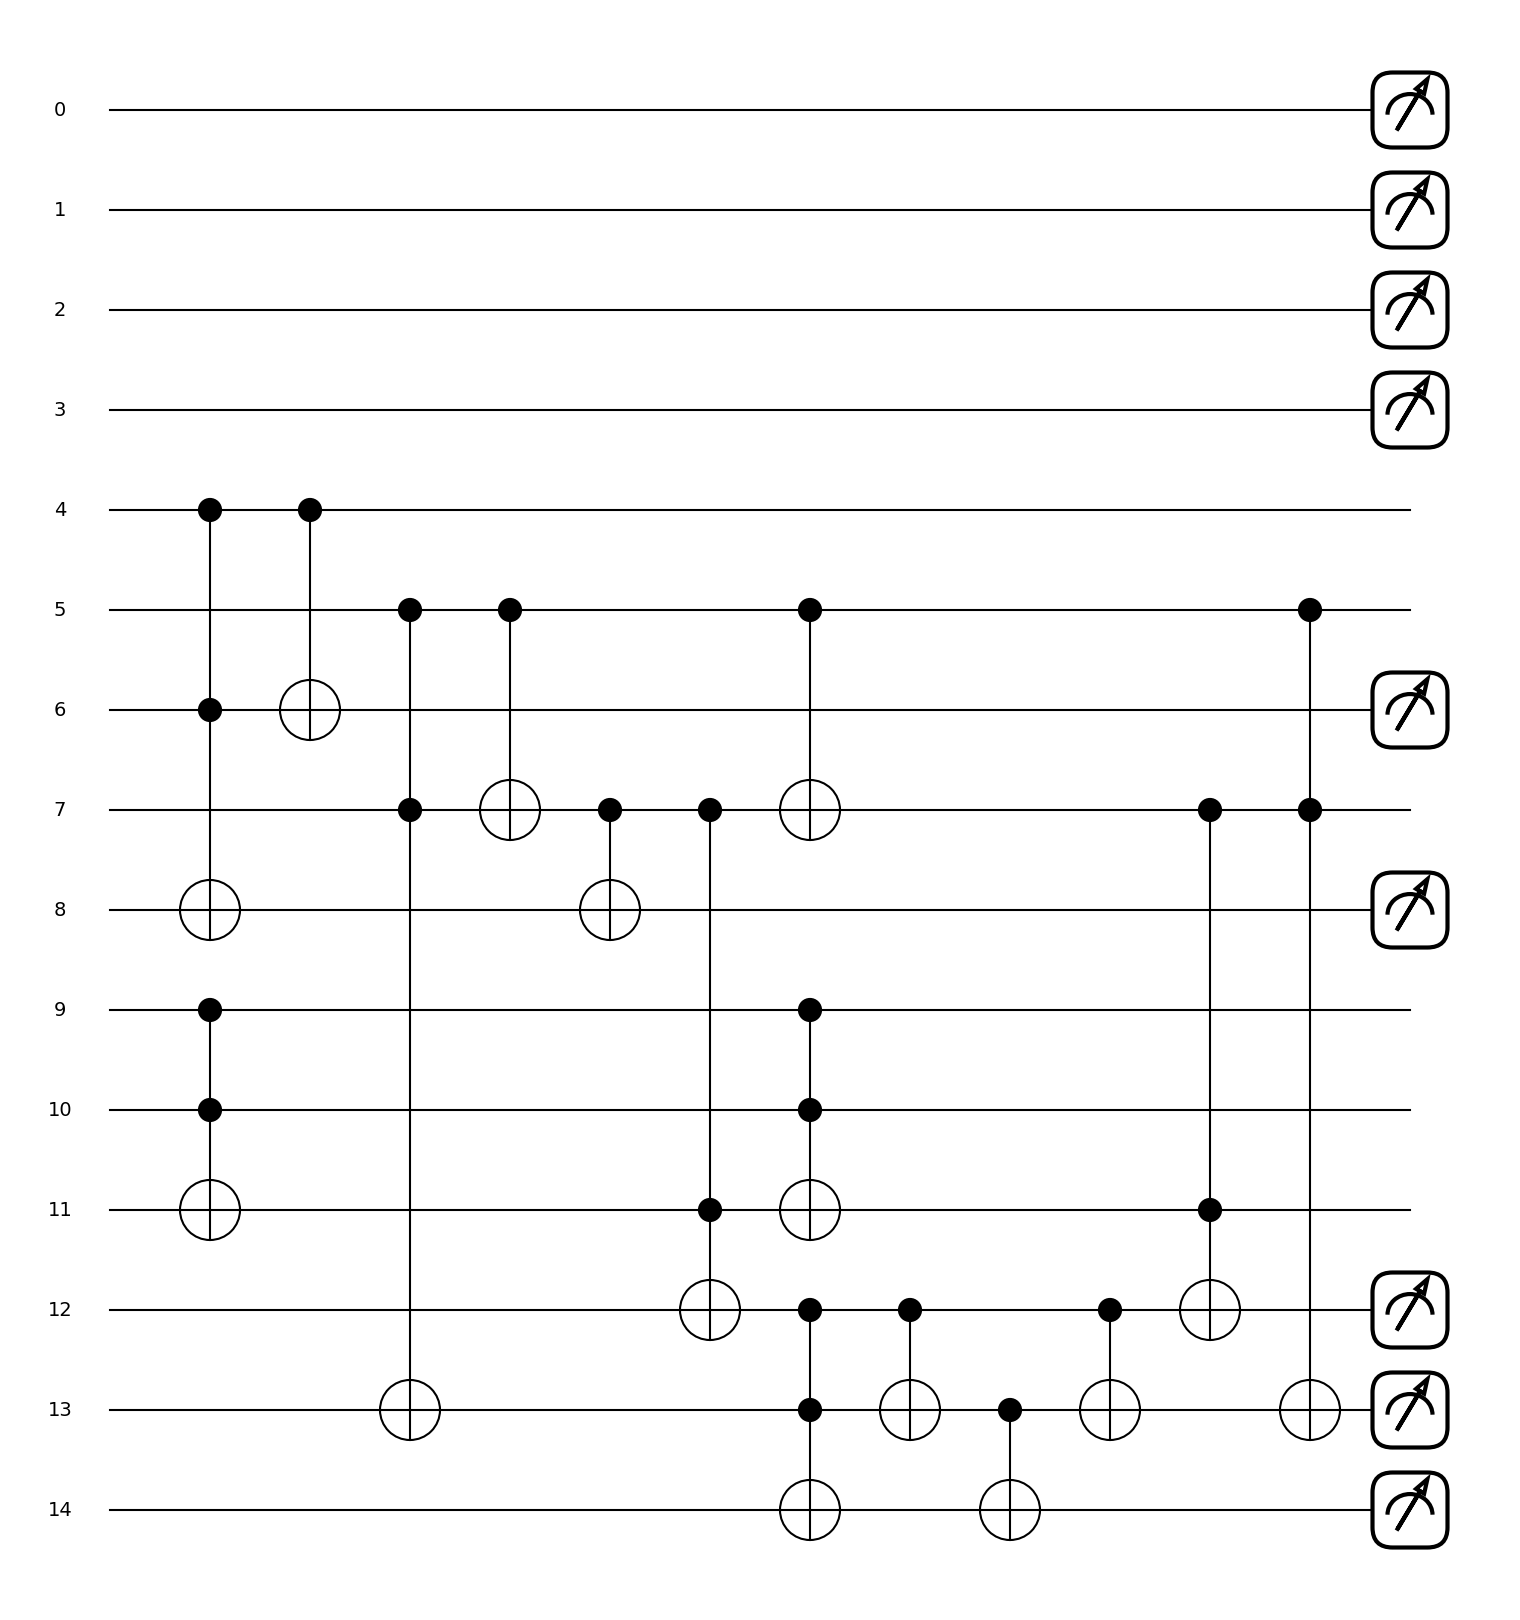

In [129]:
fig, ax = qml.draw_mpl(part_d())(0,0,0,0)

In [87]:
#            a0,a1,b0,b1          c,s0,s1
print(part_d()(0,0,0,0) == [0,0,0,0,0,0,0])
print(part_d()(0,0,1,0) == [0,0,1,0,0,1,0])
print(part_d()(0,0,0,1) == [0,0,0,1,0,0,1])
print(part_d()(0,0,1,1) == [0,0,1,1,0,1,1])
print(part_d()(1,0,0,0) == [1,0,0,0,0,1,0])
print(part_d()(1,0,1,0) == [1,0,1,0,0,0,1])
print(part_d()(1,0,0,1) == [1,0,0,1,0,1,1])
print(part_d()(1,0,1,1) == [1,0,1,1,1,0,0])
print(part_d()(0,1,0,0) == [0,1,0,0,0,0,1])
print(part_d()(0,1,1,0) == [0,1,1,0,0,1,1])
print(part_d()(0,1,0,1) == [0,1,0,1,1,0,0])
print(part_d()(0,1,1,1) == [0,1,1,1,1,1,0])
print(part_d()(1,1,0,0) == [1,1,0,0,0,1,1])
print(part_d()(1,1,1,0) == [1,1,1,0,1,0,0])
print(part_d()(1,1,0,1) == [1,1,0,1,1,1,0])
print(part_d()(1,1,1,1) == [1,1,1,1,1,0,1])
# https://www.quora.com/What-is-a-2-bit-full-adder-truth-table

[ True  True  True  True  True  True  True]
[ True  True  True  True  True  True  True]
[ True  True  True  True  True  True  True]
[ True  True  True  True  True  True  True]
[ True  True  True  True  True  True  True]
[ True  True  True  True  True  True  True]
[ True  True  True  True  True  True  True]
[ True  True  True  True  True  True  True]
[ True  True  True  True  True  True  True]
[ True  True  True  True  True  True  True]
[ True  True  True  True  True  True  True]
[ True  True  True  True  True  True  True]
[ True  True  True  True  True  True  True]
[ True  True  True  True  True  True  True]
[ True  True  True  True  True  True  True]
[ True  True  True  True  True  True  True]


In [12]:
import numpy as np
import pennylane as qml

dev = qml.device("default.qubit", wires=3)

def bell():
    qml.Hadamard(wires=1)
    qml.CNOT(wires=[1,2])

# YOUR CODE HERE: implement the circuit in the picture in the QNode below
# The QNode should return the measurement outcome probabilities on the
# last two qubits.
@qml.qnode(dev)
def quiz_3_qnode(y):
    qml.Hadamard(wires=0)
    qml.Hadamard(wires=1)
    qml.Hadamard(wires=2)

    qml.CZ(wires=[0,1])
    qml.CZ(wires=[1,2])


    m_0 = qml.measure(0)

    qml.cond(m_0 == 1, qml.RY)(y, wires=1)
    # qml.cond(m_0 == 1, qml.adjoint(bell))()
    # qml.cond(m_0 == 1, qml.adjoint(qml.CNOT))(wires=[1,2])
    # qml.cond(m_0 == 1, qml.adjoint(qml.Hadamard))(wires=[1])
    return qml.probs(wires=[1,2])


In [13]:
quiz_3_qnode(y=0.743190)

tensor([0.33458002, 0.16541998, 0.16541998, 0.33458002], requires_grad=True)

In [121]:
import numpy as np
import pennylane as qml

from pennylane.wires import Wires

def quantum_function():
    """This quantum function performs all the operations in the circuit.
    It is up to you to set up QNodes in the measurement routines
    that make use of it.
    """
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0, 1])
    qml.S(wires=1)
    qml.RZ(0.4, wires=0)
    qml.RY(0.2, wires=1)
    qml.CNOT(wires=[1, 0])


def are_commuting(obs_1, obs_2):
    """Determines if two two-qubit observables commute.

    Two observables, A and B are said to commute if AB - BA
    = 0, where 0 is the all-zeros matrix having the same size as A and B.

    The two observables will be selected from the following six options:
         qml.PauliX(0), qml.PauliX(1),
         qml.PauliY(0), qml.PauliY(1),
         qml.PauliZ(0), qml.PauliZ(1)

    Args:
        obs_1 (qml.Observable): The first two-qubit observable.
        obs_2 (qml.Observable): The second two-qubit observable.

    Returns:
        bool: True if the two observables commute, False otherwise
    """
    dev1 = qml.device('default.qubit', wires=2)
    @qml.qnode(dev1)
    def circ1():
        qml.Hadamard(wires=0)
        qml.Hadamard(wires=1)
        return qml.expval(obs_2 @ obs_1)

    dev2 = qml.device('default.qubit', wires=2)
    @qml.qnode(dev2)
    def circ2():
        qml.Hadamard(wires=0)
        qml.Hadamard(wires=1)
        return qml.expval(obs_1 @ obs_2)
    # YOUR CODE HERE
    print(circ1())
    print(circ2())
    ans = circ1() - circ2()
    return np.allclose(circ1(), circ2())


In [128]:
are_commuting(qml.PauliX(0),qml.PauliZ(0))

0.9999999999999996
0.9999999999999996


/Users/nicolas/opt/anaconda3/envs/PennyLane/lib/python3.9/site-packages/pennylane/operation.py:1830: UserWarning: Tensor object acts on overlapping wires; in some PennyLane functions this will lead to undefined behaviour
  warnings.warn(


True

In [16]:
are_commuting(1,1)[1]()

TypeError: 'bool' object is not subscriptable

In [ ]:
def measure_non_commuting_separately(obs_1, obs_2):
    """Runs a quantum circuit and computes the expectation value of
    two non-commuting observables independently.

    The expectation values must be computed from samples taken by
    running the circuit on the provided device.

    Args:
        obs_1 (qml.Observable): The first observable to measure.
        obs_2 (qml.Observable): The second observable to measure.

    Returns:
        float, float: A tuple of expectation values corresponding to obs_1
        and obs_2 respectively.
    """
    dev = qml.device("default.qubit", wires=2, shots=100000)

    # YOUR CODE HERE
    return

In [ ]:
def measure_commuting_together(obs_1, obs_2):
    """Runs a quantum circuit and computes the expectation value of
    two commuting observables.

    The expectation values must be computed from samples taken by
    running the circuit on the provided device.

    Args:
        obs_1 (qml.Observable): The first observable to measure.
        obs_2 (qml.Observable): The second observable to measure.

    Returns:
        float, float: A tuple of expectation values corresponding to obs_1
        and obs_2 respectively.
    """
    dev = qml.device("default.qubit", wires=2, shots=100000)

    # YOUR CODE HERE
    return

In [ ]:
def measure_pair_of_observables(obs_1, obs_2):
    """Compute the expectation values of two two-qubit observables.

    The two observables will be selected from the following set:
       [XI, IX, ZI, IZ, YI, IY]
    and will be provided in the following form:
        obs_1 = qml.PauliX(1)   (IX)
        obs_2 = qml.PauliZ(0)   (ZI)

    If the two observables commute, the observables can be measured
    simultaneously using the same measurement samples in the function
    `measure_commuting_together`. If not, they must be measured individually
    using the `measure_non_commuting_separately` function.

    Args:
        obs_1 (qml.Observable): The first observable to measure.
        obs_2 (qml.Observable): The second observable to measure.

    Returns:
        float, float: A tuple of expectation values corresponding to obs_1
        and obs_2 respectively.
    """

    # YOUR CODE HERE
    return